# Problem Statement

Road accidents are a significant public safety concern, often resulting in injuries, fatalities, and economic losses. Predicting the severity of road accidents can help authorities implement preventive measures and allocate emergency response resources more effectively. This project aims to analyze historical road accident data to identify key factors influencing accident severity and develop machine learning models to predict whether an accident is likely to result in a slight, serious, or fatal outcome. The ultimate goal is to support data-driven decision-making in traffic management and road safety improvements.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Changed scikitlearn to sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Road Accident Data.csv')

In [ ]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,01-05-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,01-04-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [ ]:
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,01-05-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,01-04-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [ ]:
df.tail()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,201091NM02142,2/28/2022,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0    Accident_Index             307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [ ]:
df.columns

Index([' Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
print(f'Shape of dataset: {df.shape}')

Shape of dataset: (307973, 21)


In [ ]:
print(f'duplicates rows', df.duplicated().sum())

duplicates rows 1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop('Carriageway_Hazards', axis=1, inplace=True)

In [ ]:
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_20348\1655404306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)


In [ ]:
df['Road_Type'].fillna(df['Road_Type'].mode()[0], inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_20348\2949809238.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Road_Type'].fillna(df['Road_Type'].mode()[0], inplace=True)


In [ ]:
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_20348\893974462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna(df['Time'].mode()[0], inplace=True)


In [ ]:
df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_20348\2126772261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307972 entries, 0 to 307972
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0    Accident_Index             307972 non-null  object 
 1   Accident Date               307972 non-null  object 
 2   Day_of_Week                 307972 non-null  object 
 3   Junction_Control            307972 non-null  object 
 4   Junction_Detail             307972 non-null  object 
 5   Accident_Severity           307972 non-null  object 
 6   Latitude                    307972 non-null  float64
 7   Light_Conditions            307972 non-null  object 
 8   Local_Authority_(District)  307972 non-null  object 
 9   Longitude                   307972 non-null  float64
 10  Number_of_Casualties        307972 non-null  int64  
 11  Number_of_Vehicles          307972 non-null  int64  
 12  Police_Force                307972 non-null  object 
 13  Road_Surface_Condit

In [ ]:
df.isnull().sum()

 Accident_Index               0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [ ]:
df.dtypes

 Accident_Index                object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [ ]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307972.000000,307972.000000,307972.000000,307972.000000,307972.000000
mean,52.487001,-1.368882,1.356883,1.829066,38.866001
std,1.339011,1.356093,0.815858,0.710476,14.032942
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247942,1.000000,1.000000,30.000000
50%,52.225935,-1.349254,1.000000,2.000000,30.000000
75%,53.415514,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [ ]:
df['Junction_Control'].unique()
df[df['Junction_Control'] == 'Auto traffic signal']

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
7,200901BS70008,01-02-2021,Friday,Auto traffic signal,Crossroads,Slight,51.491957,Daylight,Kensington and Chelsea,-0.178524,1,1,Metropolitan Police,Dry,Dual carriageway,30,13:18,Urban,Fine no high winds,Car
9,200901BS70010,01-10-2021,Saturday,Auto traffic signal,Crossroads,Slight,51.481150,Daylight,Kensington and Chelsea,-0.183275,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,09:52,Urban,Other,Car
10,200901BS70011,01-07-2021,Wednesday,Auto traffic signal,Crossroads,Slight,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,00:09,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307726,201091NE09819,07-04-2022,Sunday,Auto traffic signal,T or staggered junction,Slight,57.601040,Daylight,Highland,-4.428587,1,2,Northern,Dry,Single carriageway,30,19:04,Rural,Fine + high winds,Car
307744,201091NE15550,10/26/2022,Tuesday,Auto traffic signal,Other junction,Slight,57.597495,Darkness - lights lit,Highland,-4.430694,1,1,Northern,Wet or damp,Single carriageway,30,18:38,Rural,Raining no high winds,Car
307856,201091NJ10853,8/13/2022,Friday,Auto traffic signal,More than 4 arms (not roundabout),Slight,58.439486,Daylight,Highland,-3.094132,2,2,Northern,Dry,Single carriageway,30,11:30,Rural,Fine no high winds,Agricultural vehicle
307867,201091NJ13093,9/19/2022,Sunday,Auto traffic signal,Crossroads,Slight,58.438498,Darkness - lights lit,Highland,-3.094101,1,2,Northern,Wet or damp,Single carriageway,30,19:40,Rural,Raining no high winds,Car


In [ ]:
df[df['Junction_Control'] == 'Data missing or out of range']

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
12,200901BS70015,01-12-2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.498778,Daylight,Kensington and Chelsea,-0.206779,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,14:00,Urban,Raining no high winds,Car
17,200901BS70021,1/26/2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.482363,Darkness - lights lit,Kensington and Chelsea,-0.186108,1,1,Metropolitan Police,Dry,Single carriageway,30,17:05,Urban,Fine no high winds,Car
19,200901BS70024,1/27/2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.509296,Darkness - lights lit,Kensington and Chelsea,-0.194837,1,1,Metropolitan Police,Dry,Single carriageway,30,00:28,Urban,Fine no high winds,Car
38,200901BS70047,02-09-2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.497811,Daylight,Kensington and Chelsea,-0.202351,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,09:15,Urban,Raining no high winds,Car
40,200901BS70050,1/23/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.500738,Daylight,Kensington and Chelsea,-0.193879,2,1,Metropolitan Police,Wet or damp,Single carriageway,30,11:15,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307962,201091NM00839,1/23/2022,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.054889,Daylight,Highland,-4.130434,2,3,Northern,Frost or ice,Single carriageway,60,09:23,Rural,Other,Car
307963,201091NM00903,1/24/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.484296,Darkness - no lighting,Highland,-3.864768,1,1,Northern,Wet or damp,Single carriageway,40,19:30,Rural,Other,Car
307964,201091NM00939,1/25/2022,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.574536,Darkness - lights lit,Highland,-3.892627,1,2,Northern,Dry,Single carriageway,30,20:05,Rural,Fine no high winds,Car
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,-3.467828,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car


In [ ]:
df['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal', inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_20348\211603674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal', inplace=True)


In [ ]:
df['Junction_Control'].unique()

array(['Give way or uncontrolled', 'Auto traffic signal',
       'Data missing or out of range', 'Authorised person', 'Stop sign',
       'Not at junction or within 20 metres'], dtype=object)

In [ ]:
target_variable = 'Accident_Severity'  # Assuming 'Accident_Severity' is the target
print(f"\nTarget Variable Distribution:\n{df[target_variable].value_counts()}")


Target Variable Distribution:
Accident_Severity
Slight     263279
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64


In [ ]:
df['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fetal', 'Fatal'], dtype=object)

In [ ]:
# Replace 'Fetal' with 'Fatal'
df['Accident_Severity'] = df['Accident_Severity'].replace('Fetal', 'Fatal')

# (Optional) Check the updated value counts
print(df['Accident_Severity'].value_counts())

Accident_Severity
Slight     263279
Serious     40740
Fatal        3953
Name: count, dtype: int64


<Axes: xlabel='Day_of_Week', ylabel='count'>

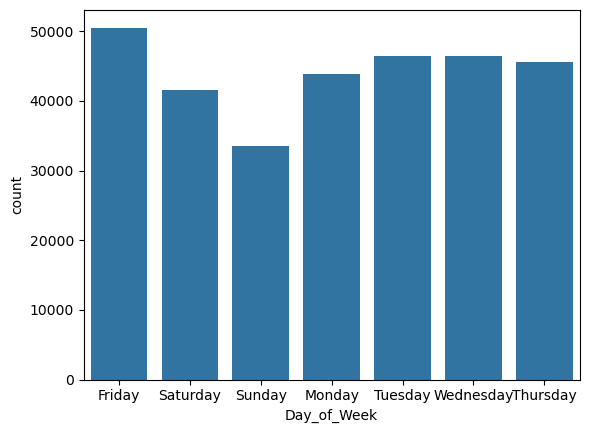

In [ ]:
days = ['Friday', 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday']
sns.countplot( data = df , x = 'Day_of_Week' , order= days)

<Axes: xlabel='Accident_Severity', ylabel='count'>

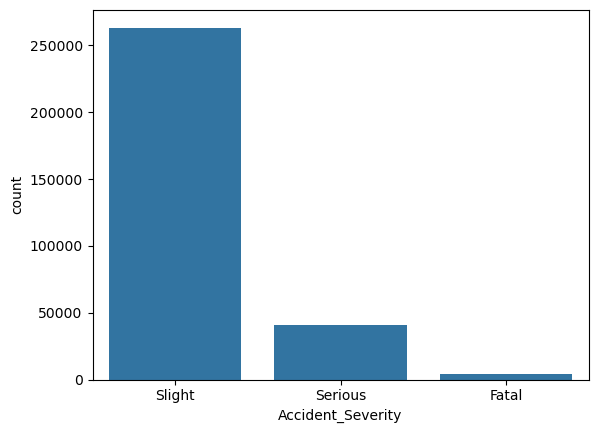

In [ ]:
sev = ['Slight' ,'Serious','Fatal']
sns.countplot(data =df ,x = 'Accident_Severity',order = sev)

In [ ]:
df['Time'].info()

<class 'pandas.core.series.Series'>
Index: 307972 entries, 0 to 307972
Series name: Time
Non-Null Count   Dtype 
--------------   ----- 
307972 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [ ]:
df['time_acc_5_minute'] = pd.to_datetime(df['Time'], format="%H:%M").dt.floor('5min').dt.time
df['time_acc_30_minute'] = pd.to_datetime(df['Time'], format="%H:%M").dt.floor('30min').dt.time
df['time_acc_1_hour'] = pd.to_datetime(df['Time'], format="%H:%M").dt.floor('1h').dt.time

In [ ]:
acc_5min = df['time_acc_5_minute'].value_counts()[:60]
acc_30min =df['time_acc_30_minute'].value_counts()
acc_1h =df['time_acc_1_hour'].value_counts()

In [ ]:
df_fridays = df[df['Day_of_Week'] == 'Friday']
df_fridays

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,time_acc_5_minute,time_acc_30_minute,time_acc_1_hour
7,200901BS70008,01-02-2021,Friday,Auto traffic signal,Crossroads,Slight,51.491957,Daylight,Kensington and Chelsea,-0.178524,...,Dry,Dual carriageway,30,13:18,Urban,Fine no high winds,Car,13:15:00,13:00:00,13:00:00
11,200901BS70012,1/16/2021,Friday,Auto traffic signal,Crossroads,Slight,51.494995,Darkness - lights lit,Kensington and Chelsea,-0.183013,...,Dry,Single carriageway,30,17:49,Urban,Fine no high winds,Car,17:45:00,17:30:00,17:00:00
13,200901BS70016,01-09-2021,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.506187,Daylight,Kensington and Chelsea,-0.209082,...,Wet or damp,Single carriageway,30,08:15,Urban,Raining no high winds,Car,08:15:00,08:00:00,08:00:00
40,200901BS70050,1/23/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.500738,Daylight,Kensington and Chelsea,-0.193879,...,Wet or damp,Single carriageway,30,11:15,Urban,Fine no high winds,Car,11:15:00,11:00:00,11:00:00
44,200901BS70054,1/30/2021,Friday,Auto traffic signal,Roundabout,Slight,51.504672,Daylight,Hammersmith and Fulham,-0.215914,...,Dry,Dual carriageway,30,08:28,Urban,Fine no high winds,Goods over 3.5t. and under 7.5t,08:25:00,08:00:00,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307938,201091NL05795,10/15/2022,Friday,Give way or uncontrolled,T or staggered junction,Slight,60.254095,Daylight,Shetland Islands,-1.293355,...,Wet or damp,Single carriageway,60,16:50,Rural,Raining no high winds,Car,16:50:00,16:30:00,16:00:00
307942,201091NL06327,11-12-2022,Friday,Auto traffic signal,Mini-roundabout,Slight,60.157151,Daylight,Shetland Islands,-1.146277,...,Dry,Single carriageway,30,14:15,Rural,Fine no high winds,Motorcycle over 500cc,14:15:00,14:00:00,14:00:00
307954,201091NM00296,01-08-2022,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.293658,Daylight,Highland,-3.630574,...,Frost or ice,Single carriageway,60,11:00,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,11:00:00,11:00:00,11:00:00
307965,201091NM01053,1/29/2022,Friday,Give way or uncontrolled,Crossroads,Slight,57.572162,Daylight,Highland,-3.930799,...,Frost or ice,Single carriageway,60,08:00,Rural,Other,Van / Goods 3.5 tonnes mgw or under,08:00:00,08:00:00,08:00:00


In [ ]:
acc_1h = df_fridays['time_acc_1_hour'].value_counts()
acc_1h

time_acc_1_hour
17:00:00    4418
15:00:00    4399
16:00:00    4291
08:00:00    3712
18:00:00    3476
14:00:00    3261
13:00:00    3114
12:00:00    2843
19:00:00    2830
11:00:00    2418
09:00:00    2373
10:00:00    2096
07:00:00    1959
20:00:00    1936
21:00:00    1686
22:00:00    1502
23:00:00    1334
06:00:00     822
00:00:00     558
01:00:00     360
05:00:00     359
02:00:00     325
03:00:00     258
04:00:00     199
Name: count, dtype: int64

In [ ]:
vehicle_acc_freq = df['Vehicle_Type'].value_counts()
vehicle_acc_freq

Vehicle_Type
Car                                      239793
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

In [ ]:
acc_area = df['Urban_or_Rural_Area'].value_counts()
acc_area

Urban_or_Rural_Area
Urban    198532
Rural    109440
Name: count, dtype: int64

In [ ]:
acc_rural = df.loc[df['Urban_or_Rural_Area'] == 'Rural']
acc_rural.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,time_acc_5_minute,time_acc_30_minute,time_acc_1_hour
5803,200901ID60003,1/15/2021,Thursday,Give way or uncontrolled,Roundabout,Slight,51.468364,Darkness - lights lit,Hillingdon,-0.507015,...,Dry,Dual carriageway,70,05:38,Rural,Fine no high winds,Car,05:35:00,05:30:00,05:00:00
5817,200901ID60022,06-09-2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.475760,Daylight,London Airport (Heathrow),-0.494677,...,Dry,Single carriageway,30,19:05,Rural,Fine no high winds,Car,19:05:00,19:00:00,19:00:00
5843,200901ID60058,11/26/2021,Thursday,Auto traffic signal,T or staggered junction,Slight,51.477829,Darkness - lights unlit,London Airport (Heathrow),-0.494753,...,Wet or damp,Single carriageway,30,06:43,Rural,Fine no high winds,Car,06:40:00,06:30:00,06:00:00
6037,200901JC30252,06-07-2021,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.640054,Daylight,Waltham Forest,-0.011593,...,Flood over 3cm. deep,Single carriageway,30,10:50,Rural,Fine no high winds,Car,10:50:00,10:30:00,10:00:00
6221,200901JC30470,9/25/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.634152,Darkness - no lighting,Waltham Forest,0.018062,...,Dry,Single carriageway,30,19:03,Rural,Fine no high winds,Motorcycle over 500cc,19:00:00,19:00:00,19:00:00


In [ ]:
acc_week_days = acc_rural['Day_of_Week'].value_counts()
acc_week_days

Day_of_Week
Friday       17578
Wednesday    15909
Tuesday      15813
Saturday     15536
Thursday     15395
Monday       15387
Sunday       13822
Name: count, dtype: int64

[Text(0, 3, '17578'),
 Text(0, 3, '15909'),
 Text(0, 3, '15813'),
 Text(0, 3, '15536'),
 Text(0, 3, '15395'),
 Text(0, 3, '15387'),
 Text(0, 3, '13822')]

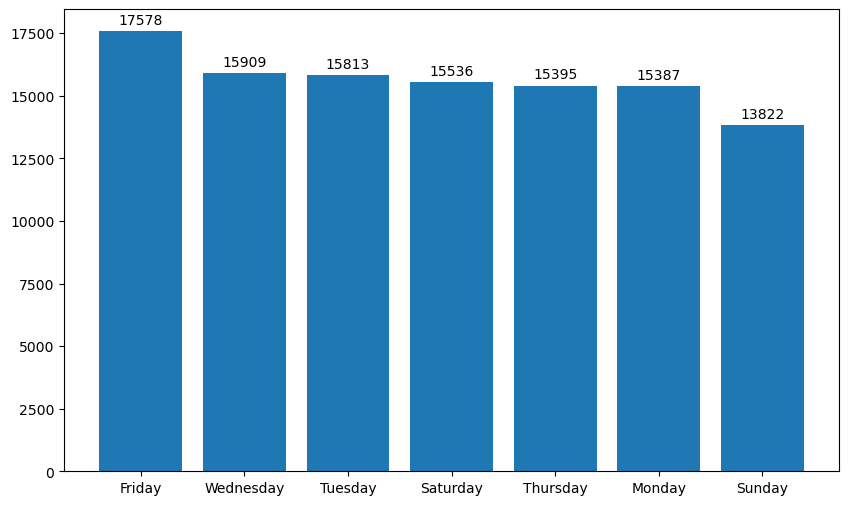

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars=ax.bar(acc_week_days.index, acc_week_days.values)
ax.bar_label(bars, padding=3)

In [ ]:
mapping = {'Slight': 0, 'Serious': 1, 'Fatal': 2}
df['Accident_Severity'] = df['Accident_Severity'].map(mapping)

In [ ]:
weather_mapping = {
    'Fine no high winds': 1,
    'Raining + high winds': 2,
    'Snowing no high winds': 3,
}
df['Weather_Conditions'] = df['Weather_Conditions'].map(weather_mapping)

In [ ]:
light_mapping = {
    'Daylight': 1,
    'Darkness - lights lit': 2,
    'Unknown': 0
}
df['Light_Conditions'] = df['Light_Conditions'].map(light_mapping)

In [ ]:
urban_mapping = {
    'Urban': 1,
    'Rural': 2,
    'Unknown': 0
}
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].map(urban_mapping)

In [ ]:
df.select_dtypes(include=['float64', 'int64']).skew()

Accident_Severity       2.465473
Latitude                0.999366
Light_Conditions        1.430607
Longitude              -0.378502
Number_of_Casualties    5.685365
Number_of_Vehicles      1.853603
Speed_limit             1.142120
Urban_or_Rural_Area     0.604418
Weather_Conditions      5.966205
dtype: float64

In [ ]:
df['Number_of_Casualties'] = np.log1p(df['Number_of_Casualties'])
df['Number_of_Vehicles'] = np.log1p(df['Number_of_Vehicles'])
df['Speed_limit'] = np.log1p(df['Speed_limit'])

In [ ]:
from sklearn.cluster import KMeans

coords = df[['Latitude', 'Longitude']]
df['Location_Cluster'] = KMeans(n_clusters=10, random_state=42).fit_predict(coords)

In [ ]:
le = LabelEncoder()
df['Light_Conditions'] = le.fit_transform(df['Light_Conditions'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

In [ ]:
# Assuming your DataFrame is named df
X = df.drop(columns=['Accident_Severity'])  # drop the target
X = add_constant(X)  # adds a constant term for intercept

In [ ]:
print(X.dtypes)

const                         float64
 Accident_Index                object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Latitude                      float64
Light_Conditions                int64
Local_Authority_(District)     object
Longitude                     float64
Number_of_Casualties          float64
Number_of_Vehicles            float64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                   float64
Time                           object
Urban_or_Rural_Area             int64
Weather_Conditions            float64
Vehicle_Type                   object
time_acc_5_minute              object
time_acc_30_minute             object
time_acc_1_hour                object
Location_Cluster                int32
dtype: object


In [ ]:
print(X.isnull().sum())

const                             0
 Accident_Index                   0
Accident Date                     0
Day_of_Week                       0
Junction_Control                  0
Junction_Detail                   0
Latitude                          0
Light_Conditions                  0
Local_Authority_(District)        0
Longitude                         0
Number_of_Casualties              0
Number_of_Vehicles                0
Police_Force                      0
Road_Surface_Conditions           0
Road_Type                         0
Speed_limit                       0
Time                              0
Urban_or_Rural_Area               0
Weather_Conditions            49055
Vehicle_Type                      0
time_acc_5_minute                 0
time_acc_30_minute                0
time_acc_1_hour                   0
Location_Cluster                  0
dtype: int64


In [ ]:
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,...,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,time_acc_5_minute,time_acc_30_minute,time_acc_1_hour,Location_Cluster
0,200901BS70001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,1,51.512273,0,Kensington and Chelsea,-0.201349,...,One way street,3.433987,15:11,1,1.0,Car,15:10:00,15:00:00,15:00:00,3
1,200901BS70002,01-05-2021,Monday,Give way or uncontrolled,Crossroads,1,51.514399,0,Kensington and Chelsea,-0.199248,...,Single carriageway,3.433987,10:59,1,1.0,Taxi/Private hire car,10:55:00,10:30:00,10:00:00,3
2,200901BS70003,01-04-2021,Sunday,Give way or uncontrolled,T or staggered junction,0,51.486668,0,Kensington and Chelsea,-0.179599,...,Single carriageway,3.433987,14:19,1,1.0,Taxi/Private hire car,14:15:00,14:00:00,14:00:00,3
3,200901BS70004,01-05-2021,Monday,Auto traffic signal,T or staggered junction,1,51.507804,0,Kensington and Chelsea,-0.203110,...,Single carriageway,3.433987,08:10,1,NaN,Motorcycle over 500cc,08:10:00,08:00:00,08:00:00,3
4,200901BS70005,01-06-2021,Tuesday,Auto traffic signal,Crossroads,1,51.482076,1,Kensington and Chelsea,-0.173445,...,Single carriageway,3.433987,17:25,1,1.0,Car,17:25:00,17:00:00,17:00:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,0,57.374005,0,Highland,-3.467828,...,Single carriageway,4.110874,07:00,2,1.0,Car,07:00:00,07:00:00,07:00:00,5
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,0,57.232273,2,Highland,-3.809281,...,Single carriageway,4.110874,03:00,2,1.0,Car,03:00:00,03:00:00,03:00:00,5
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,0,57.585044,0,Highland,-3.862727,...,Single carriageway,3.433987,09:38,2,1.0,Car,09:35:00,09:30:00,09:00:00,5
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,1,57.214898,2,Highland,-3.823997,...,Single carriageway,4.110874,18:25,2,1.0,Motorcycle over 500cc,18:25:00,18:00:00,18:00:00,5


In [ ]:
# Drop non-numeric columns if any
X_numeric = X.select_dtypes(include=['number'])

# Drop rows with missing values (or use imputation instead)
X_numeric = X_numeric.dropna()

# Re-add constant for VIF
from statsmodels.tools.tools import add_constant
X_numeric = add_constant(X_numeric)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                Feature          VIF
0                 const  1983.430934
1              Latitude     1.186721
2      Light_Conditions     1.042722
3             Longitude     1.162840
4  Number_of_Casualties     1.088860
5    Number_of_Vehicles     1.081481
6           Speed_limit     1.923005
7   Urban_or_Rural_Area     1.913970
8    Weather_Conditions     1.012618
9      Location_Cluster     1.036639


In [ ]:
# If 'Speed_limit' has high VIF and overlaps with 'Urban_or_Rural_Area'
df = df.drop(columns=['Speed_limit'])

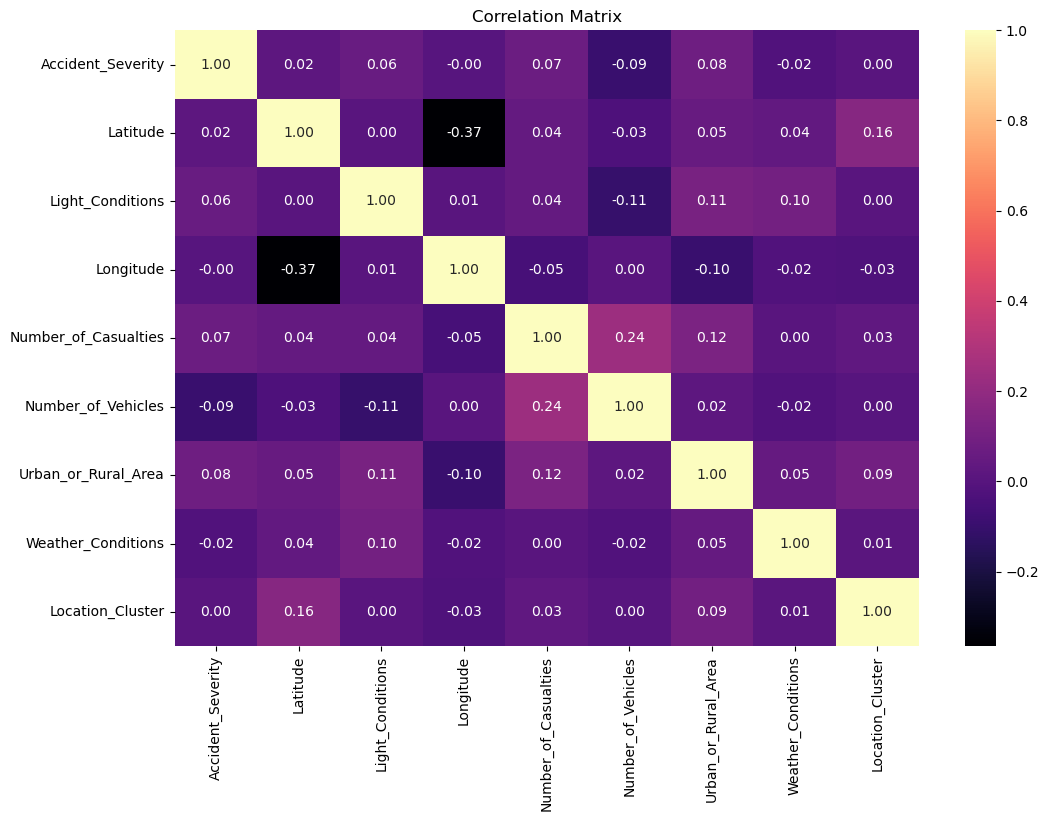

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# If df is your updated DataFrame
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print(df.columns.tolist())

[' Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type', 'time_acc_5_minute', 'time_acc_30_minute', 'time_acc_1_hour', 'Location_Cluster']


In [ ]:
X = df.drop(['Accident_Severity'], axis=1)  # Only drop columns that exist
y = df['Accident_Severity']

X = X.select_dtypes(include=[np.number])

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

Longitude               0.465633
Latitude                0.465051
Number_of_Vehicles      0.025545
Number_of_Casualties    0.016284
Location_Cluster        0.010500
Light_Conditions        0.007098
Urban_or_Rural_Area     0.005215
Weather_Conditions      0.004673
dtype: float64


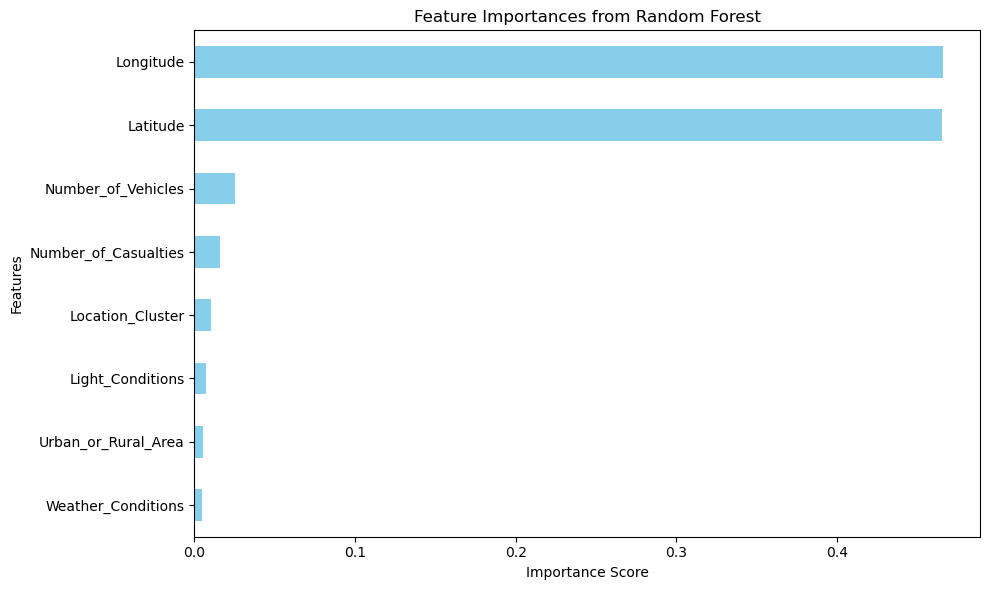

In [ ]:
import matplotlib.pyplot as plt

# Sort and plot
importances.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer (mean strategy here)
imputer = SimpleImputer(strategy='mean')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit on training data and transform
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

In [ ]:
# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8280217550125822

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     52784
           1       0.20      0.07      0.10      8040
           2       0.03      0.01      0.01       771

    accuracy                           0.83     61595
   macro avg       0.36      0.34      0.34     61595
weighted avg       0.76      0.83      0.79     61595


Confusion Matrix:
 [[50427  2226   131]
 [ 7433   570    37]
 [  694    72     5]]


In [ ]:
log = LogisticRegression(max_iter=1000)  # Add max_iter if needed
log.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log.predict(X_test_imputed)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8569526747300917

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     52784
           1       0.50      0.00      0.00      8040
           2       0.00      0.00      0.00       771

    accuracy                           0.86     61595
   macro avg       0.45      0.33      0.31     61595
weighted avg       0.80      0.86      0.79     61595


Confusion Matrix:
 [[52783     1     0]
 [ 8039     1     0]
 [  771     0     0]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
rs = RandomForestClassifier()
rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8271612955597045

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     52784
           1       0.19      0.07      0.10      8040
           2       0.03      0.01      0.01       771

    accuracy                           0.83     61595
   macro avg       0.36      0.34      0.34     61595
weighted avg       0.76      0.83      0.79     61595


Confusion Matrix:
 [[50378  2279   127]
 [ 7437   566    37]
 [  699    67     5]]


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_imputed, y_train)
y_pred = knn.predict(X_test_imputed)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8401331276889358

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     52784
           1       0.22      0.05      0.08      8040
           2       0.00      0.00      0.00       771

    accuracy                           0.84     61595
   macro avg       0.36      0.34      0.33     61595
weighted avg       0.77      0.84      0.79     61595


Confusion Matrix:
 [[51331  1443    10]
 [ 7622   417     1]
 [  727    44     0]]


In [ ]:
dc=DecisionTreeClassifier()
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7571393781962822

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     52784
           1       0.16      0.17      0.17      8040
           2       0.02      0.02      0.02       771

    accuracy                           0.76     61595
   macro avg       0.35      0.35      0.35     61595
weighted avg       0.76      0.76      0.76     61595


Confusion Matrix:
 [[45246  6860   678]
 [ 6497  1372   171]
 [  600   153    18]]


In [ ]:
# svc = SVC()
# svc.fit(X_train_imputed, y_train)
# y_pred = svc.predict(X_test_imputed)

In [ ]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# gnb = GaussianNB()
# # gnb.fit(X_train_imputed, y_train)
# # y_pred = gnb.predict(X_test_imputed)

In [ ]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
eda_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing (%)': df.isnull().mean().round(4),
    'Unique Values': df.nunique(),
    'Data Type': df.dtypes
})
eda_summary.to_csv("eda_summary.csv", index=False)
eda_summary.head()

,Column,Missing (%),Unique Values,Data Type
Accident_Index,Accident_Index,0.0,197644,object
Accident Date,Accident Date,0.0,730,object
Day_of_Week,Day_of_Week,0.0,7,object
Junction_Control,Junction_Control,0.0,6,object
Junction_Detail,Junction_Detail,0.0,9,object


In [ ]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model,model_file)

In [ ]:
! pip install flask

Defaulting to user installation because normal site-packages is not writeable
